In [ ]:
# Original dataset is downloaded from https://nyu-mll.github.io/CoLA/
# It is in form of txt file and has parse tree along with the data, 
# I am filtering these data to just have sentence, acceptability

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

COLA_model_path = "COLA_models"
os.chdir('/content/drive/MyDrive/Studies/NLP_PROJECT')

In [3]:
DATASET_COLUMNS_COLA = ['acceptability', 'sentence']
DATASET_ENCODING = "ISO-8859-1"
org_dataset = pd.read_csv('original_cola.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS_COLA, usecols=DATASET_COLUMNS_COLA, header=None)
my_dataset = pd.read_csv('my_cola.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS_COLA, usecols=DATASET_COLUMNS_COLA, header=None)
# dataset = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS, usecols=[q1, q2, is_duplicate], header=Noneencoding=DATASET_ENCODING, names=DATASET_COLUMNS, usecols=['target', 'text'], header=None)

In [4]:
print(org_dataset.head(), my_dataset.head())

   acceptability                                           sentence
0  acceptability                                           sentence
1              1  One more pseudo generalization and I'm giving up.
2              1   One more pseudo generalization or I'm giving up.
3              1     The more we study verbs, the crazier they get.
4              1          Day by day the facts are getting murkier.    acceptability                                           sentence
0  acceptability                                           sentence
1              1  a expect low-sex worker can receptive, to been...
2              0  Puppies born of two different breeds in a litter.
3              1  what done as or use many an everyday expressio...
4              0  What will happen to the man's girlfriend after...


In [5]:
org_dataset = org_dataset.dropna()
org_dataset.isnull().sum()

acceptability    0
sentence         0
dtype: int64

In [6]:
my_dataset = my_dataset.dropna()
my_dataset.isnull().sum()

acceptability    0
sentence         0
dtype: int64

(8551, 2)


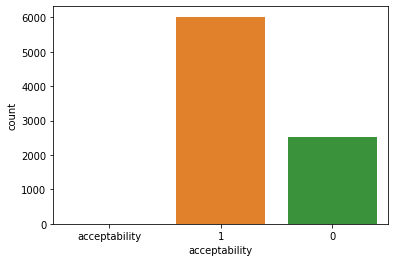

In [7]:
import seaborn as sns
sns.countplot(x='acceptability', data=org_dataset)
print(org_dataset.shape)

(38182, 2)


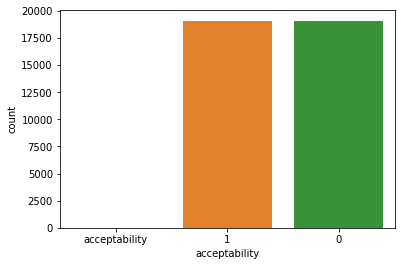

In [8]:
sns.countplot(x='acceptability', data=my_dataset)
print(my_dataset.shape)

In [9]:
print(org_dataset.shape)
org_dataset.info()
print(org_dataset.acceptability.unique())
print("\n"+"#"*80)
print(my_dataset.shape)
my_dataset.info()
print(my_dataset.acceptability.unique())

(8551, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8551 entries, 0 to 8550
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   acceptability  8551 non-null   object
 1   sentence       8551 non-null   object
dtypes: object(2)
memory usage: 520.4+ KB
['acceptability' '1' '0']

################################################################################
(38182, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38182 entries, 0 to 38181
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   acceptability  38182 non-null  object
 1   sentence       38182 non-null  object
dtypes: object(2)
memory usage: 2.1+ MB
['acceptability' '1' '0']


In [10]:
# Skipping(headers)
org_dataset = org_dataset[1:]
my_dataset = my_dataset[1:]

In [11]:
org_dataset['acceptability'] = org_dataset['acceptability'].replace('0', 0)
org_dataset['acceptability'] = org_dataset['acceptability'].replace('1', 1)
my_dataset['acceptability'] = my_dataset['acceptability'].replace('0', 0)
my_dataset['acceptability'] = my_dataset['acceptability'].replace('1', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [12]:
# So the actual dataset size is ~400k and mine is 21k ~5% of the datset.
# Downsample original data to 20944, so both models are trained on same number of data.
from sklearn.model_selection import train_test_split
sampled_org_dataset, _ = train_test_split(org_dataset, train_size=8500, stratify=org_dataset['acceptability'])
train_org_dataset, validation_org_dataset = train_test_split(sampled_org_dataset, train_size=0.8, stratify=sampled_org_dataset['acceptability'])
validation_org_dataset, test_org_dataset = train_test_split(validation_org_dataset, train_size=0.5, stratify=validation_org_dataset['acceptability'])
sampled_my_dataset, _ = train_test_split(my_dataset, train_size=8500)
train_my_dataset, validation_my_dataset = train_test_split(my_dataset, train_size=0.8, stratify=my_dataset['acceptability'])
validation_my_dataset,  _ = train_test_split(validation_my_dataset, train_size=0.5, stratify=validation_my_dataset['acceptability'])

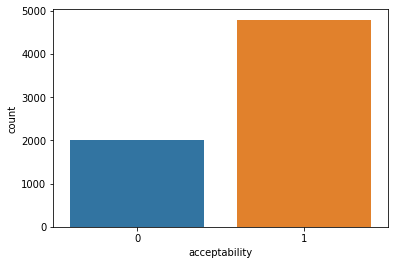

In [13]:
sns.countplot(x='acceptability', data=train_org_dataset)

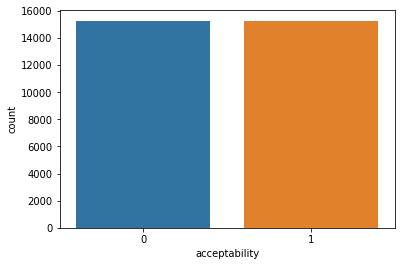

In [14]:
sns.countplot(x='acceptability', data=train_my_dataset)

In [15]:
train_org = "train_org.csv"
val_org = "val_org.csv"
test_org = "test_org.csv"
train_my = "train_my.csv"
val_my = "val_my.csv"
train_org_dataset.to_csv(os.path.join(COLA_model_path, train_org))
validation_org_dataset.to_csv(os.path.join(COLA_model_path, val_org))
test_org_dataset.to_csv(os.path.join(COLA_model_path, test_org))
train_my_dataset.to_csv(os.path.join(COLA_model_path, train_my))
validation_my_dataset.to_csv(os.path.join(COLA_model_path, val_my))

In [17]:
!pip install transformers
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

     |████████████████████████████████| 3.1 MB 14.0 MB/s 
     |████████████████████████████████| 596 kB 53.0 MB/s 
     |████████████████████████████████| 61 kB 682 kB/s 
     |████████████████████████████████| 895 kB 75.5 MB/s 
     |████████████████████████████████| 3.3 MB 50.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [18]:
max_input_length = tokenizer.max_model_input_sizes['bert-base-uncased']
def tokenize_sentence(sentence):
    tokens = tokenizer.tokenize(sentence) 
    tokens = tokens[:max_input_length-2]
    return tokens

In [22]:
import torch
from torchtext.legacy import data

init_token_idx = tokenizer.cls_token_id
eos_token_idx = tokenizer.sep_token_id
pad_token_idx = tokenizer.pad_token_id
unk_token_idx = tokenizer.unk_token_id

TEXT = data.Field(batch_first = True,
                  use_vocab = False,
                  tokenize = tokenize_sentence,
                  preprocessing = tokenizer.convert_tokens_to_ids,
                  init_token = init_token_idx,
                  eos_token = eos_token_idx,
                  pad_token = pad_token_idx,
                  unk_token = unk_token_idx)

LABEL = data.LabelField(dtype = torch.float)
#First colum has serial num used for random split, ignore it.
fields = [(None, None),('label', LABEL), ('text', TEXT)]
train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path = COLA_model_path,
                                        train = 'train_org.csv',
                                        validation = 'val_org.csv',
                                        test = 'test_org.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True)
MAX_VOCAB_SIZE = 25_000
TEXT.build_vocab(train_data, max_size = MAX_VOCAB_SIZE)
LABEL.build_vocab(train_data)
BATCH_SIZE = 128
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    shuffle=True,
    sort=False,
    device = device)

In [23]:
import torch.nn as nn
import torch.nn.functional as F
from transformers import BertModel
bert = BertModel.from_pretrained('bert-base-uncased')

class BERTSentiment(nn.Module):
    def __init__(self, bert, output_dim, dropout):
        super().__init__()
        self.bert = bert
        embedding_dim = bert.config.to_dict()['hidden_size']
        self.lin1 = nn.Linear(embedding_dim, 512, bias=True)
        self.lin2 = nn.Linear(512, 256, bias=True)
        self.lin3 = nn.Linear(256, 128, bias=True)
        self.lin4 = nn.Linear(128, 64, bias=True)
        self.dropout = nn.Dropout(dropout)
        self.out = nn.Linear(64, output_dim)
        self.relu = torch.nn.ReLU()
        
    def forward(self, text):
      
        with torch.no_grad():
            embedded = self.bert(text)[0]
        hidden = self.relu(self.lin1(embedded))
        hidden = self.dropout(hidden)
        hidden = self.relu(self.lin2(hidden))
        hidden = self.dropout(hidden)
        hidden = self.relu(self.lin3(hidden))
        hidden = self.dropout(hidden)
        hidden = self.relu(self.lin4(hidden))
        hidden = self.dropout(hidden)
        hidden = self.out(hidden)
        #Reduce the dimension from [128, length, 1] to [128, 1]
        hidden = torch.mean(hidden, dim=1)
        return hidden

model = BERTSentiment(bert, 1, 0.3)
for name, param in model.named_parameters():                
    if name.startswith('bert'):
        param.requires_grad = False

import torch.optim as optim
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [24]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() 
    acc = correct.sum() / len(correct)
    return acc

def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for batch in iterator:
        optimizer.zero_grad()       
        predictions = model(batch.text).squeeze(1)
        loss = criterion(predictions, batch.label)       
        acc = binary_accuracy(predictions, batch.label)     
        loss.backward()        
        optimizer.step()       
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0    
    model.eval()
    
    with torch.no_grad():   
        for batch in iterator:
            predictions = model(batch.text).squeeze(1)           
            loss = criterion(predictions, batch.label)           
            acc = binary_accuracy(predictions, batch.label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


import time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

N_EPOCHS = 50

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
        
    end_time = time.time()
        
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'bert-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

test_loss, test_acc = evaluate(model, test_iterator, criterion)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 6s
	Train Loss: 0.604 | Train Acc: 70.41%
	 Val. Loss: 0.600 |  Val. Acc: 70.31%
Epoch: 02 | Epoch Time: 0m 6s
	Train Loss: 0.572 | Train Acc: 70.52%
	 Val. Loss: 0.551 |  Val. Acc: 70.56%
Epoch: 03 | Epoch Time: 0m 6s
	Train Loss: 0.555 | Train Acc: 71.61%
	 Val. Loss: 0.518 |  Val. Acc: 71.73%
Epoch: 04 | Epoch Time: 0m 6s
	Train Loss: 0.529 | Train Acc: 73.38%
	 Val. Loss: 0.548 |  Val. Acc: 72.23%
Epoch: 05 | Epoch Time: 0m 6s
	Train Loss: 0.503 | Train Acc: 75.81%
	 Val. Loss: 0.561 |  Val. Acc: 72.42%
Epoch: 06 | Epoch Time: 0m 6s
	Train Loss: 0.499 | Train Acc: 75.46%
	 Val. Loss: 0.528 |  Val. Acc: 73.56%
Epoch: 07 | Epoch Time: 0m 6s
	Train Loss: 0.476 | Train Acc: 77.85%
	 Val. Loss: 0.510 |  Val. Acc: 74.52%
Epoch: 08 | Epoch Time: 0m 6s
	Train Loss: 0.453 | Train Acc: 79.04%
	 Val. Loss: 0.515 |  Val. Acc: 73.96%
Epoch: 09 | Epoch Time: 0m 6s
	Train Loss: 0.438 | Train Acc: 79.59%
	 Val. Loss: 0.671 |  Val. Acc: 71.85%
Epoch: 10 | Epoch Time: 0m 6

In [34]:
TEXT = data.Field(batch_first = True,
                  use_vocab = False,
                  tokenize = tokenize_sentence,
                  preprocessing = tokenizer.convert_tokens_to_ids,
                  init_token = init_token_idx,
                  eos_token = eos_token_idx,
                  pad_token = pad_token_idx,
                  unk_token = unk_token_idx)

LABEL = data.LabelField(dtype = torch.float)
#First colum has serial num used for random split, ignore it.
fields = [(None, None),('label', LABEL), ('text', TEXT)]
train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path = COLA_model_path,
                                        train = 'train_my.csv',
                                        validation = 'val_my.csv',
                                        test = 'test_org.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True)
MAX_VOCAB_SIZE = 25_000
TEXT.build_vocab(train_data, max_size = MAX_VOCAB_SIZE)
LABEL.build_vocab(train_data)
BATCH_SIZE = 128
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE,
    shuffle=True,
    sort=False,
    device = device)

In [35]:
model = BERTSentiment(bert, 1, 0.3)
for name, param in model.named_parameters():                
    if name.startswith('bert'):
        param.requires_grad = False

import torch.optim as optim
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

In [36]:
N_EPOCHS = 50

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
        
    end_time = time.time()
        
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'bert-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

test_loss, test_acc = evaluate(model, test_iterator, criterion)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 3m 33s
	Train Loss: 0.642 | Train Acc: 61.68%
	 Val. Loss: 0.603 |  Val. Acc: 66.86%
Epoch: 02 | Epoch Time: 3m 31s
	Train Loss: 0.573 | Train Acc: 68.60%
	 Val. Loss: 0.546 |  Val. Acc: 70.46%
Epoch: 03 | Epoch Time: 3m 33s
	Train Loss: 0.546 | Train Acc: 70.48%
	 Val. Loss: 0.531 |  Val. Acc: 71.78%
Epoch: 04 | Epoch Time: 3m 31s
	Train Loss: 0.532 | Train Acc: 71.31%
	 Val. Loss: 0.524 |  Val. Acc: 71.75%
Epoch: 05 | Epoch Time: 3m 32s
	Train Loss: 0.526 | Train Acc: 71.86%
	 Val. Loss: 0.513 |  Val. Acc: 72.34%
Epoch: 06 | Epoch Time: 3m 31s
	Train Loss: 0.517 | Train Acc: 72.42%
	 Val. Loss: 0.526 |  Val. Acc: 71.90%
Epoch: 07 | Epoch Time: 3m 33s
	Train Loss: 0.515 | Train Acc: 72.53%
	 Val. Loss: 0.527 |  Val. Acc: 71.66%
Epoch: 08 | Epoch Time: 3m 33s
	Train Loss: 0.511 | Train Acc: 72.61%
	 Val. Loss: 0.517 |  Val. Acc: 72.02%
Epoch: 09 | Epoch Time: 3m 30s
	Train Loss: 0.505 | Train Acc: 73.27%
	 Val. Loss: 0.511 |  Val. Acc: 72.49%
Epoch: 10 | Epoch T